# Least Squares

In [1]:
import numpy as np
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(5 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

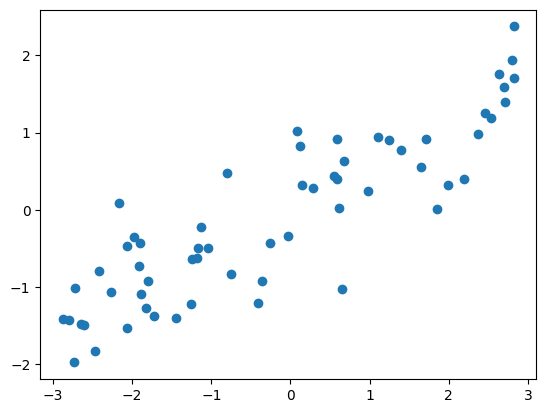

In [2]:
import matplotlib.pyplot as plt

X, y = make_wave(n_samples=60)
plt.scatter(X, y)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [4]:
lr.coef_

array([0.4966359])

In [5]:
lr.intercept_

np.float64(-0.003547055384333392)

In [6]:
lr.score(X_train, y_train)

0.7412171276539806

In [7]:
lr.score(X_test, y_test)

0.8400610110988681

In [8]:
X_train_ext = np.concatenate((X_train, X_train**2), axis = 1)
X_test_ext = np.concatenate((X_test, X_test**2), axis = 1)

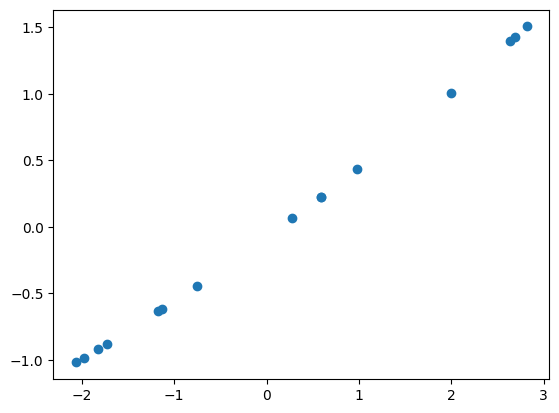

In [9]:
lr = LinearRegression().fit(X_train_ext, y_train)
y_hat = lr.predict(X_test_ext)
%matplotlib inline
plt.scatter(X_test, y_hat)

In [10]:
print(lr.score(X_train_ext, y_train))
print(lr.score(X_test_ext, y_test))

0.7443612095410588
0.8433574307084799


In [11]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes['data'].shape

(442, 10)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(diabetes['data'])
y = diabetes['target']
X.shape

(442, 65)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [14]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.604815329837055
0.42424194594593756


# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train)

0.42791319284620444

In [16]:
ridge.score(X_test, y_test)

0.4387018239867466

In [17]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train)

0.15099790967423454

In [18]:
ridge10.score(X_test, y_test)

0.15644986167540842

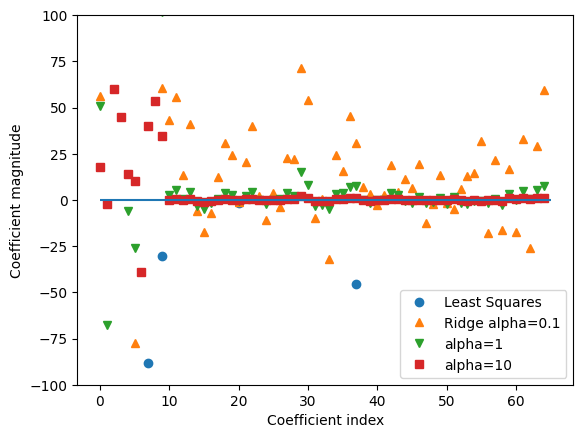

In [19]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(lr.coef_ , 'o', label="Least Squares")
plt.plot(ridge01.coef_ , '^', label="Ridge alpha=0.1")
plt.plot(ridge.coef_ ,'v',label="alpha=1")
plt.plot(ridge10.coef_ ,'s',label="alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-100,100)
plt.legend()

# Lasso

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
lasso.score(X_train, y_train)

0.34687336241711

In [21]:
lasso.score(X_test, y_test)

0.3791413953419158

In [22]:
np.sum(lasso.coef_ != 0)

np.int64(3)

In [23]:
lasso001 = Lasso(alpha=0.014, max_iter = 100000).fit(X_train, y_train)
lasso001.score(X_train, y_train)

0.5261606240788235

In [24]:
lasso001.score(X_test, y_test)

0.5016587090113085

In [25]:
np.sum(lasso001.coef_ != 0)

np.int64(13)

In [26]:
lasso00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train, y_train)
lasso00001.score(X_train, y_train)

0.6011668318910368

In [27]:
lasso00001.score(X_test, y_test)

0.447947925626335

In [28]:
np.sum(lasso00001.coef_ != 0)

np.int64(55)

Text(0, 0.5, 'Coefficient magnitude')

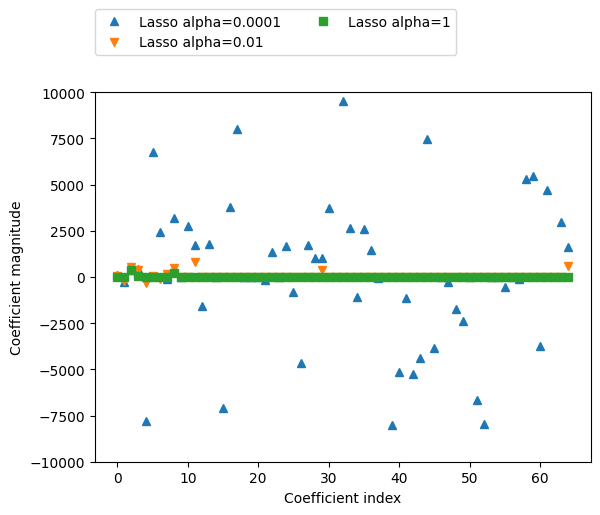

In [29]:
plt.plot(lasso00001.coef_, '^', label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'v', label="Lasso alpha=0.01")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.legend(ncol=2,loc=(0,1.10))
plt.ylim(-10000,10000)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Exercises

1. Yes since the tigher the range Alpha is, the closer to 0 the coefficients of Ridge becomes.
2. It shows where the y-value of 0 is and shows the different coefficients in relation to it.
3. The smaller alpha becomes, the closer to zero the coefficients of lasso are. This is the opposite of what ridge regression is.
4. It is keeping a counter of all coefficients within lasso that is == to zero.
5. It indicates the # of labels that the legend can fit horizontally + the padding between the legend and the graph itself.